In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx

In [2]:
network = networkx.generators.scale_free_graph(1000)
print network.number_of_edges()

2190


In [3]:
import random
INFECTED = 1
NOT_INFECTED = 0

# initialization
def initialization(network, d):
    for node in network.nodes():
        network.node[node]['infected'] = NOT_INFECTED
# start with fraction of nodes being infected
    amtInfected = int(d * network.number_of_nodes())
    for i in range(amtInfected):
        x = random.choice(network.nodes())
        network.node[x]['infected'] = INFECTED
    return amtInfected

# tn each time step: determine state transition based on prev state
def update_network(network, p, p2, num_infections):
    for node in network.nodes():
        if network.node[node]['infected'] is INFECTED:
            for n in network.neighbors(node):
                # and infect them w prob p
                if network.node[n]['infected'] is NOT_INFECTED:
                    x = random.random()
                    if x < p:
                    # infect, check by if p is 1.0, it is always true
                        network.node[n]['infected'] = INFECTED
                        num_infections += 1
            y = random.random()
            if y < p2:
                network.node[node]['infected'] = NOT_INFECTED
                num_infections -= 1
    return num_infections

<function matplotlib.pyplot.show>

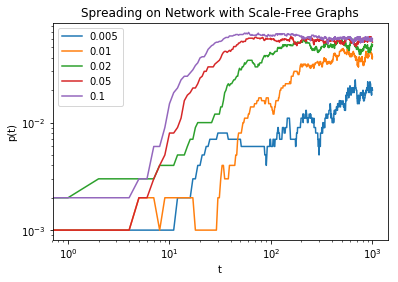

In [8]:
d = 0.01

ps = [.005, .01, .02, .05, .1]
p2 = .005

amtInf = initialization(network, d)
total = []

for j in range(len(ps)):
    networkcopy = network.copy()
    p = ps[j]
    result = []
    num_infections = 1
    result.append(float(num_infections) / float(network.number_of_nodes()))
    for i in range(1000):
        num_infections = update_network(networkcopy, p, p2, num_infections)
        density = float(num_infections) / float(network.number_of_nodes())
        result.append(density)
    total.append(result)
    
len(total)

import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(total)):
    plt.plot(total[i])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Spreading on Network with Scale-Free Graphs')
plt.legend(ps)
plt.show

In [9]:
survival = []
for i in range(len(total)):
    temp = []
    for j in range(len(total[i])):
        temp.append(1 - total[i][j])
    survival.append(temp)

<function matplotlib.pyplot.show>

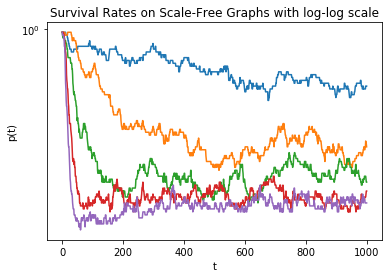

In [10]:
for i in range(len(total)):
    plt.plot(survival[i])
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Survival Rates on Scale-Free Graphs with log-log scale')
plt.show